# _E.coli_ Core Model Pertubation
This notebook focuses on the analysis and perturbation of _Escherichia coli_ genome-scale metabolic model, providing a framework to study the organism's metabolic capabilities and responses to genetic and environmental changes. Here, we will perform simulations to assess the effects of
- Knocking out single genes and reactions
- All single deletions
- Double deletions
- Changing growth medium
- Minimal media

In [1]:
# Import necessary libraries and functions
import cobra
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
model = read_sbml_model('C:/Users/User/Downloads/e_coli_core.xml')
from cobra.flux_analysis import(single_gene_deletion, single_reaction_deletion, double_gene_deletion, double_reaction_deletion)
from cobra.medium import minimal_medium

### Single reaction knock out

In [5]:
# knock-out - reaction not allowed to have flux at all

print('Complete model:', model.optimize())
with model: # ensures these knockouts are temporary, preserving the original model for subsequent analyses
    model.reactions.PFK.knock_out() 
    print('PFK knock-out model:',model.optimize())

Complete model: <Solution 0.874 at 0x1a6b7a36388>
PFK knock-out model: <Solution 0.704 at 0x1a6b7a36648>


Text(0, 0.5, 'Growth')

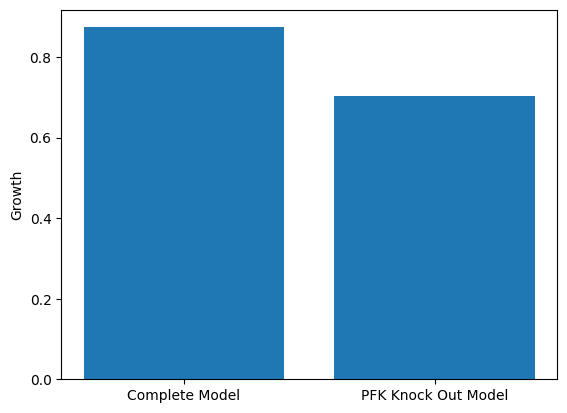

In [6]:
# Displaying graphically

Complete_model_flux = model.optimize()
with model:
    model.reactions.PFK.knock_out()
    PFK_knock_out_flux = model.optimize()


Fluxes = [Complete_model_flux.objective_value,PFK_knock_out_flux.objective_value]

Models = ['Complete Model','PFK Knock Out Model']
 
plt.bar(Models, Fluxes)
plt.ylabel('Growth')

In the complete (wild-type) model, the optimal growth rate is 0.874, reflecting the unperturbed metabolic capacity of the organism. After the PFK reaction is knocked out, the growth rate decreases to 0.704, indicating a significant but not catastrophic reduction in the organism's ability to grow. This suggests that while PFK is important for efficient metabolism, alternative pathways may partially compensate for its loss, highlighting the metabolic flexibility of _E. coli_.

### Single gene knock out
For evaluating genetic manipulation strategies, it is more interesting to examine what happens if given genes are knocked out as doing so can affect no reactions in case of redundancy, or more reactions if gene when is participating in more than one reaction.

In [26]:
print('Complete Model', model.optimize())
with model:
    model.genes.b1723.knock_out() # knocking out gene id b1723 only
    print('pfkA knocked out', model.optimize())
with model:
    model.genes.b3916.knock_out() # knocking out gene id b3916 only
    print('pfkB knocked out', model.optimize())

Complete Model <Solution 0.874 at 0x1a6b942c688>
pfkA knocked out <Solution 0.874 at 0x1a6b942c808>
pfkB knocked out <Solution 0.874 at 0x1a6b942c948>


In [24]:
# Serially knocking out both pfkA and pfkB genes
print('Complete Model', model.optimize())
with model:
    model.genes.b1723.knock_out() 
    print('pfkA knocked out', model.optimize())
    model.genes.b3916.knock_out()
    print('pfkB knocked out', model.optimize())

Complete Model <Solution 0.874 at 0x1a6b82920c8>
pfkA knocked out <Solution 0.874 at 0x1a6b8292208>
pfkB knocked out <Solution 0.704 at 0x1a6b8292108>


Text(0, 0.5, 'Growth (mmol / (gDW * h))')

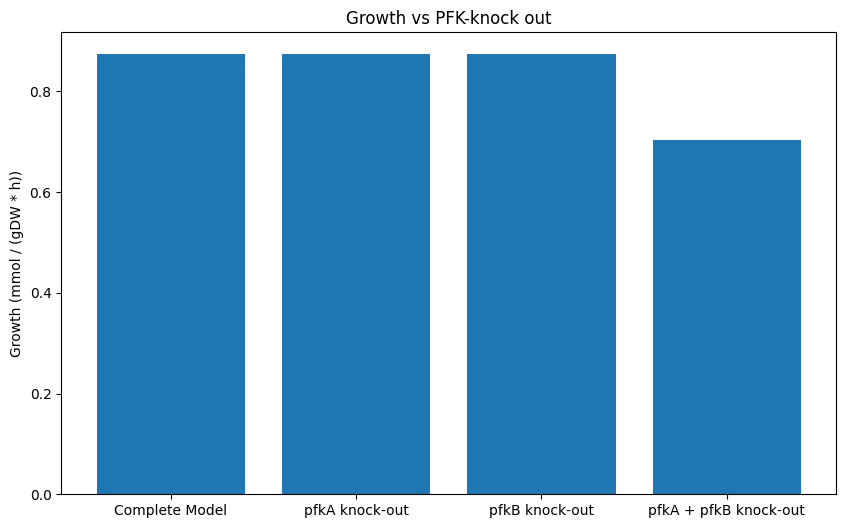

In [2]:
# Displaying serial knock out results graphically
wild_type_flux = model.optimize()
with model:
    model.genes.b1723.knock_out()
    pfkA_knock_out_flux = model.optimize()
with model:
    model.genes.b3916.knock_out()
    pfkB_knock_out_flux = model.optimize()
with model:
    model.genes.b1723.knock_out()
    model.genes.b3916.knock_out()
    double_knock_out_flux = model.optimize()

Growth_fluxes = [wild_type_flux.objective_value, pfkA_knock_out_flux.objective_value, pfkB_knock_out_flux.objective_value, double_knock_out_flux.objective_value]
model_changes = ['Complete Model', 'pfkA knock-out', 'pfkB knock-out', 'pfkA + pfkB knock-out']

plt.figure(figsize=(10, 6))
plt.title ('Growth vs PFK-knock out')
plt.bar(model_changes, Growth_fluxes)
plt.ylabel('Growth (mmol / (gDW * h))')

Knocking out the pfkA or pfkB gene separately had no impact on the growth rate, which remains at 0.874, the same as the complete model. This suggests that the metabolic network compensates for the loss of pfkA or pfkB, likely through redundant functionality in the model.

In [53]:
# Performing all single gene deletions on a model

deletion_results = single_gene_deletion(model)
pd.set_option('display.max_rows', None)
deletion_results

,ids,growth,status
0,{b2458},8.739215e-01,optimal
1,{s0001},2.111407e-01,optimal
2,{b1779},-4.774279e-16,optimal
3,{b3493},8.739215e-01,optimal
4,{b3732},3.742299e-01,optimal
5,{b4395},8.739215e-01,optimal
6,{b3731},3.742299e-01,optimal
7,{b0485},8.739215e-01,optimal
8,{b3919},7.040369e-01,optimal
9,{b4122},8.739215e-01,optimal


<AxesSubplot:xlabel='ids'>

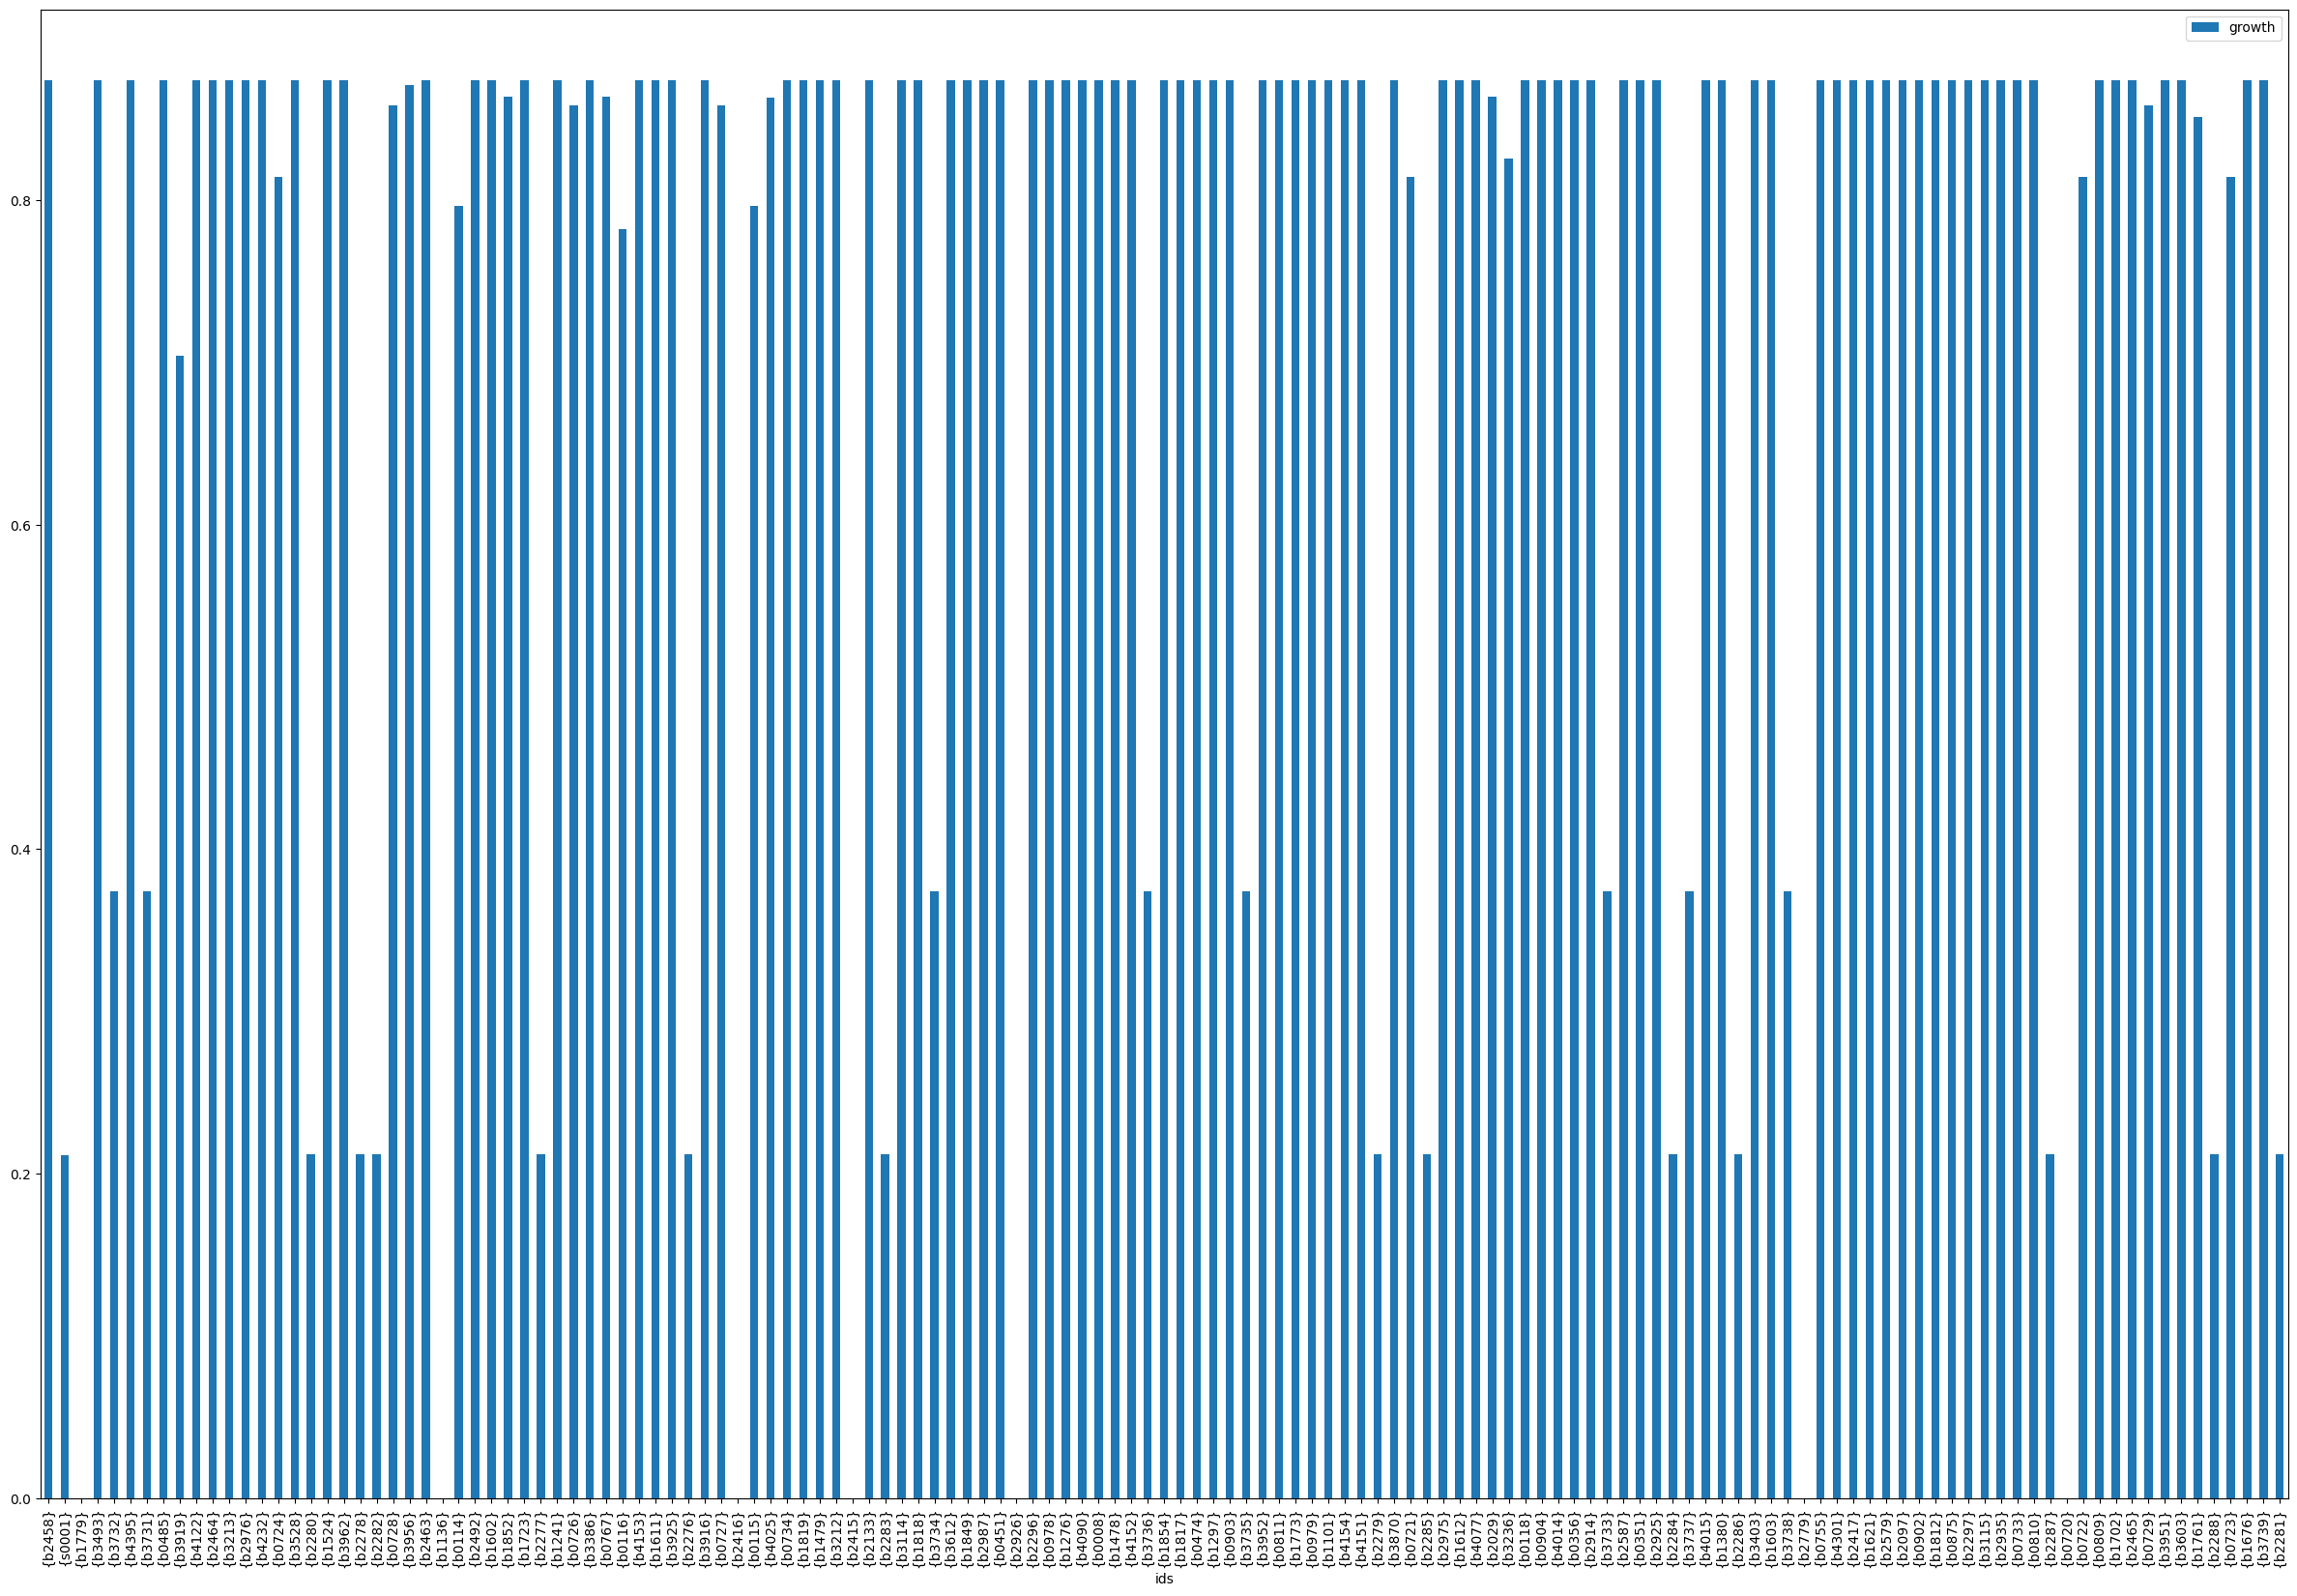

In [54]:
df = pd.DataFrame(deletion_results)
df.plot.bar(x='ids', y='growth', figsize=(30, 20))

In [57]:
essential_genes = {}
for index, row in deletion_results.iterrows():
    if row['growth'] <= 0.0 or pd.isna(row['growth']):  # Check if growth is less than or equal to zero or Nan after the knockout
        gene = next(iter(row['ids'])) # Retrieve the gene ID from the 'ids' column
        reactions = [reaction.name for reaction in model.genes.get_by_id(gene).reactions]
        essential_genes[gene] = reactions  # Store the gene and its associated reactions
essential_genes

{'b1779': ['Glyceraldehyde-3-phosphate dehydrogenase'],
 'b2416': ['Fructose transport via PEP:Pyr PTS (f6p generating)',
  'D-glucose transport via PEP:Pyr PTS'],
 'b2415': ['Fructose transport via PEP:Pyr PTS (f6p generating)',
  'D-glucose transport via PEP:Pyr PTS']}

Gene <mark>b1779</mark> - Glyceraldehyde-3-phosphate dehydrogenase (GAPDH) - key step in the glycolysis pathway, where glyceraldehyde-3-phosphate (G3P) is converted to 1,3-bisphosphoglycerate

Gene <mark>b2416</mark> and <mark>b2415</mark> - Fructose transport via PEP:Pyr PTS (f6p generating), D-glucose transport via PEP:Pyr PTS - transport of fructose and glucose into the cell using the phosphoenolpyruvate-dependent phosphotransferase system (PEP:Pyr PTS)

### Single reaction knock-out

In [58]:
# Performing all single single reaction deletions on the model

reaction_deletions = single_reaction_deletion(model)
pd.set_option('display.max_rows', None)
reaction_deletions

,ids,growth,status
0,{ALCD2x},8.739215e-01,optimal
1,{ACONTb},-1.376403e-15,optimal
2,{PFK},7.040369e-01,optimal
3,{EX_nh4_e},1.183072e-16,optimal
4,{G6PDH2r},8.638133e-01,optimal
5,{FRD7},8.739215e-01,optimal
6,{EX_pi_e},5.650092e-15,optimal
7,{THD2},8.739215e-01,optimal
8,{PYK},8.649260e-01,optimal
9,{NADH16},2.116629e-01,optimal


<AxesSubplot:xlabel='ids'>

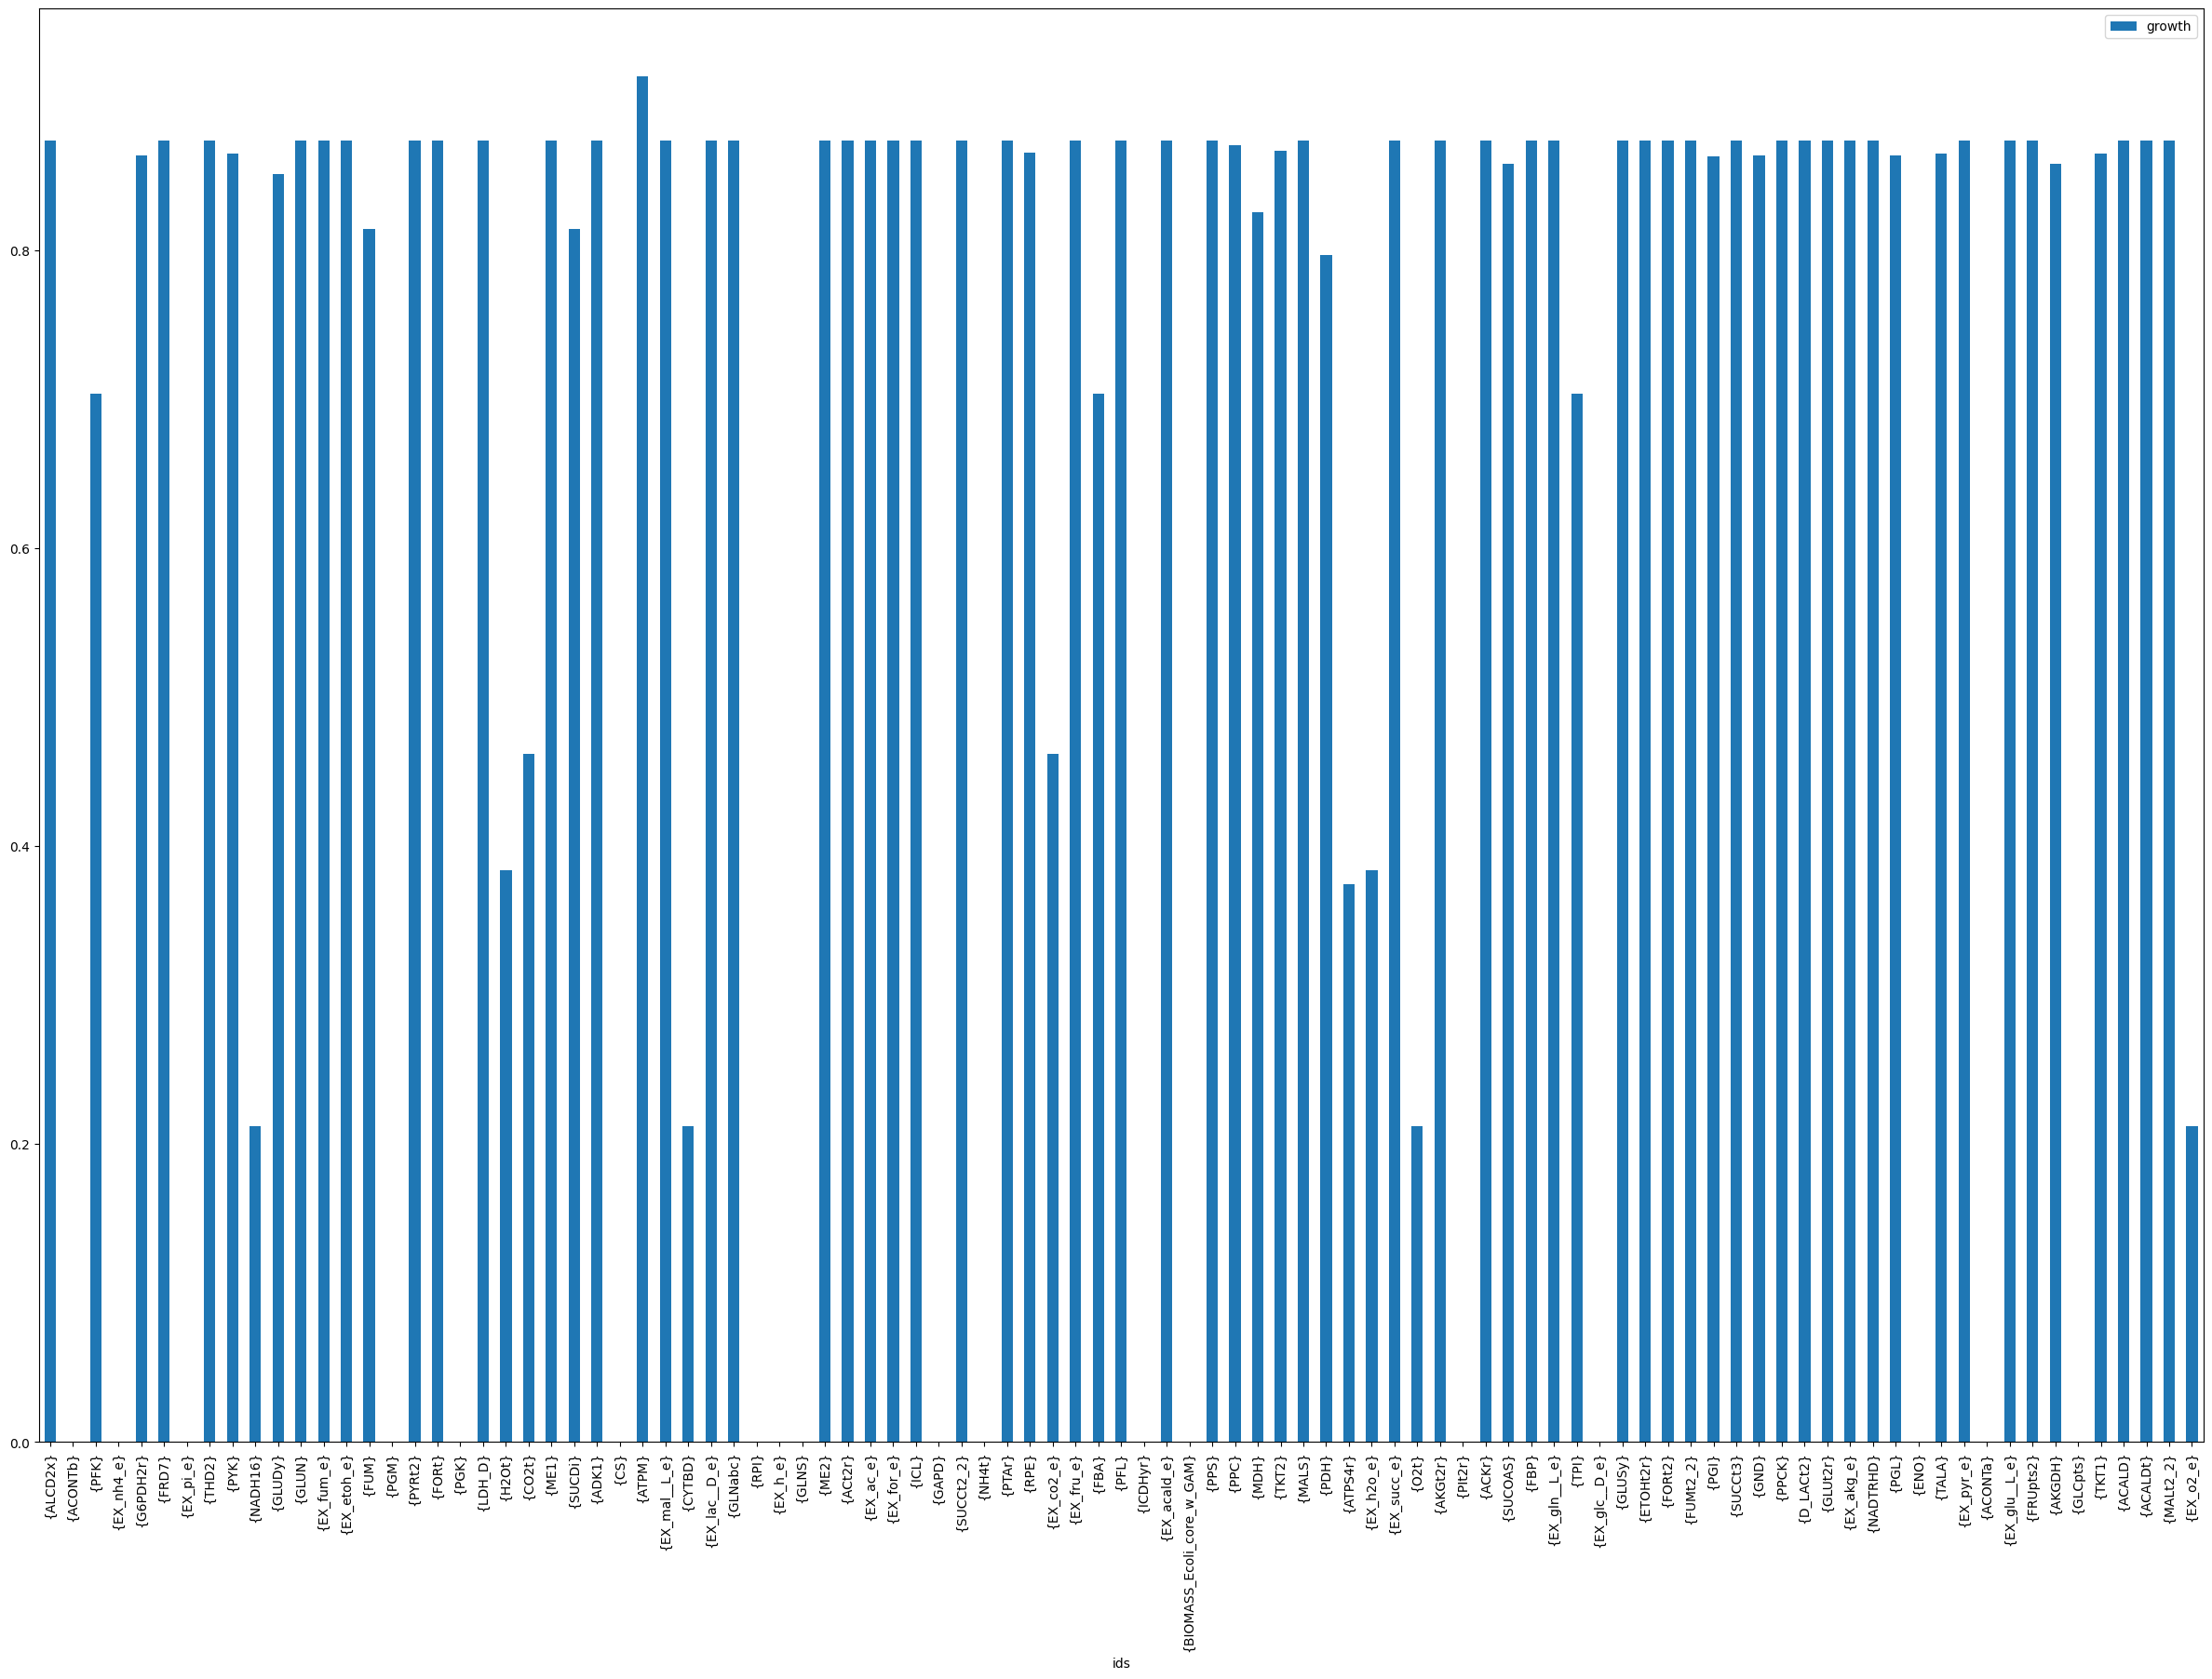

In [59]:
df = pd.DataFrame(reaction_deletions)
df.plot.bar(x='ids', y='growth', figsize=(30, 20))

In [61]:
essential_reactions = {}
for index, row in reaction_deletions.iterrows():
    if row['growth'] <= 0.0 or pd.isna(row['growth']):  # Check if growth is less than or equal to zero or Nan after the knockout
        reaction_id = next(iter(row['ids'])) # Retrieve the reaction ID from the 'ids' column
        reactions = model.reactions.get_by_id(reaction_id).name
        essential_reactions[reaction_id] = reactions  # Store the reaction and its associated name
essential_reactions

{'ACONTb': 'Aconitase (half-reaction B, Isocitrate hydro-lyase)',
 'CS': 'Citrate synthase',
 'EX_h_e': 'H+ exchange',
 'GLNS': 'Glutamine synthetase',
 'BIOMASS_Ecoli_core_w_GAM': 'Biomass Objective Function with GAM',
 'EX_glc__D_e': 'D-Glucose exchange',
 'ACONTa': 'Aconitase (half-reaction A, Citrate hydro-lyase)',
 'GLCpts': 'D-glucose transport via PEP:Pyr PTS'}

The number of essential reactions is typically higher because reactions are more directly tied to the metabolic network's functionality, while genes often have built-in redundancies or alternative pathways compensating for their knockout. This distinction highlights the importance of analyzing both gene- and reaction-level essentiality to fully understand the metabolic network's resilience and vulnerabilities.

### Double Deletions

In [62]:
# Comparing double deletion results

single = single_reaction_deletion(model)
double = double_reaction_deletion(model)

print('ATPM', single.knockout['ATPM'])
print('ATPM + EX_o2_e', double.knockout[{'ATPM','EX_o2_e'}])

ATPM        ids    growth   status
26  {ATPM}  0.916647  optimal
ATPM + EX_o2_e                   ids    growth   status
3606  {ATPM, EX_o2_e}  0.304591  optimal


Text(0, 0.5, 'Growth Flux')

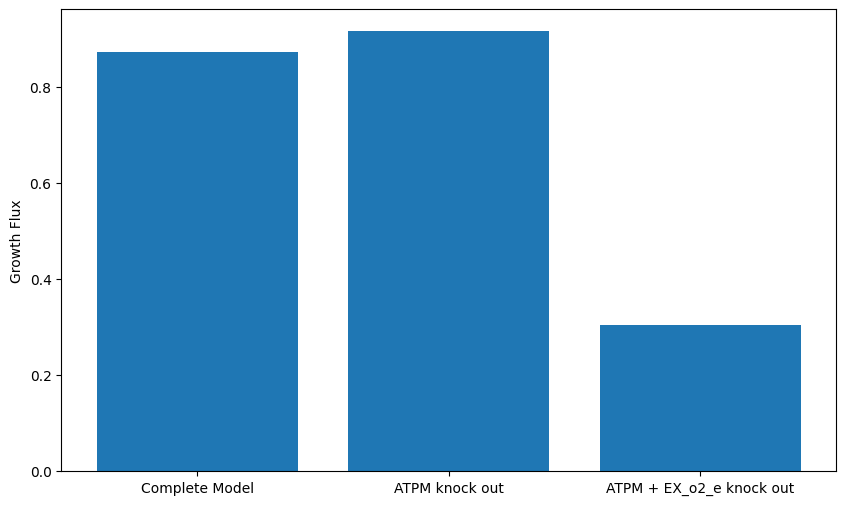

In [64]:
# Displaying double deletion results graphically
complete_model = model.optimize()
single_deletion_result = single_reaction_deletion(model).knockout['ATPM']
double_deletion_result = double_reaction_deletion(model).knockout[{'ATPM','EX_o2_e'}]

growth_fluxes = [complete_model.objective_value, single_deletion_result.iat[0,1], double_deletion_result.iat[0,1]]
models = ['Complete Model','ATPM knock out','ATPM + EX_o2_e knock out']
plt.figure(figsize=(10, 6))
plt.bar(models, growth_fluxes)
plt.ylabel("Growth Flux")

Knocking out the ATP maintenance reaction (ATPM) increases the growth flux (no energy cost of cellular maintenance independent of biomass production).
Knocking out both ATPM and the oxygen exchange reaction (EX_o2_e) significantly reduces growth flux. This indicates that oxygen is essential for growth, likely due to its role in oxidative phosphorylation, which is the primary pathway for ATP production. Without oxygen, anaerobic ATP production is less efficient, leading to slower growth despite the removal of the ATPM requirement

### Changing Growth Medium

In [67]:
# Investigating the current growth medium of the model

model.medium

{'EX_co2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0}

In [71]:
# Changing the metabolism from aerobic growth to anaerobic growth

medium = model.medium
with model:
    medium['EX_o2_e'] = 0.0
    model.medium = medium
    print(model.medium)
    anaerobic_flux = model.slim_optimize() # Optimizes the flux only through the objective function
    
anaerobic_flux
# EX_o2_e no longer appears because this dictionary only provides the exchange reactions with non-zero upper flux bounds

{'EX_co2_e': 1000.0, 'EX_glc__D_e': 10.0, 'EX_h_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_pi_e': 1000.0}


0.21166294973531008

In [72]:
aerobic_flux = model.slim_optimize()
aerobic_flux

0.8739215069684307

Text(0, 0.5, 'Growth')

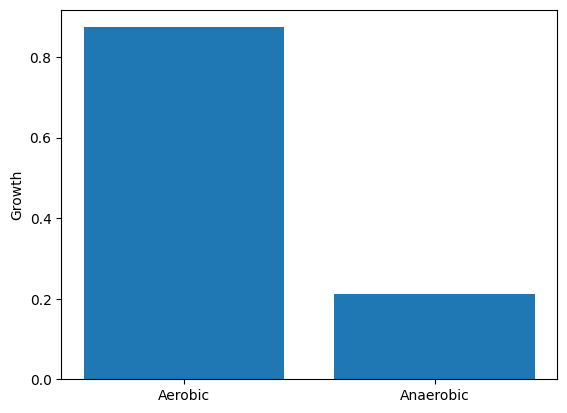

In [73]:
fluxes = [aerobic_flux,anaerobic_flux]
models = ['Aerobic','Anaerobic']
plt.bar(models,fluxes)
plt.ylabel('Growth')

Oxygen is crucial for efficient energy generation, and its absence limits growth due to a metabolic shift to less efficient anaerobic energy production pathways.

### Minimal Media
-  smallest growth medium that can maintain a specific growth rate

In [31]:
max_growth = model.slim_optimize() # variable to hold the specific growth rate to be achieved
minimal_medium(model,max_growth)

EX_glc__D_e    10.000000
EX_nh4_e        4.765319
EX_o2_e        21.799493
EX_pi_e         3.214895
dtype: float64

Above results show that Glucose import is the limiting factor of growth as it maintains the same flux through the exchange reaction during both optimal and minimal media.

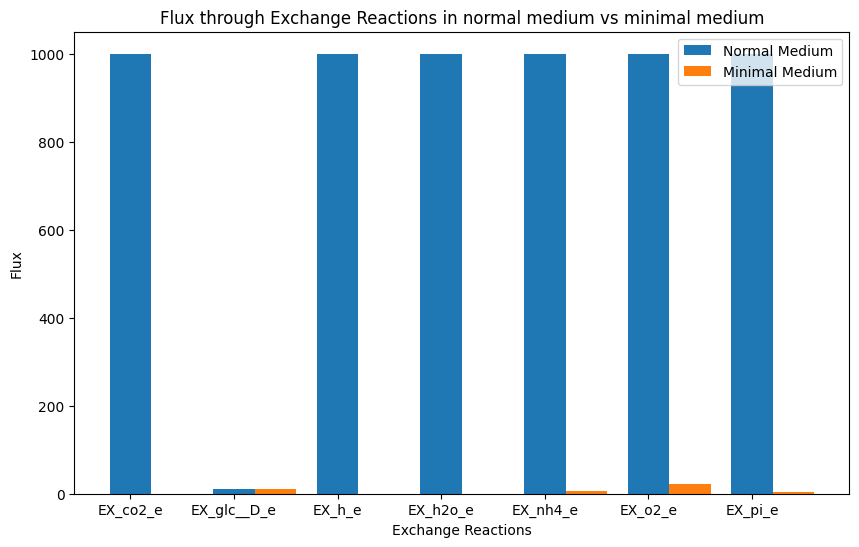

In [75]:
# Comparative representation graphically

normal_medium = model.medium
#Extracting keys of the dictionary to a list
normal_medium_keys = list(normal_medium.keys())
normal_medium_values = list(normal_medium.values())

max_growth = model.slim_optimize()
minimalmedium = minimal_medium(model,max_growth)
minimal_medium_keys = minimalmedium.keys()
minimal_medium_values=[]
for r in normal_medium_keys:
    if r in minimal_medium_keys:
        minimal_medium_values.append(minimalmedium[r])
    else:
        minimal_medium_values.append(0)

X = np.arange(len(normal_medium_keys))
width = 0.4
plt.figure(figsize=(10, 6))
plt.bar(X, normal_medium_values, width, label = 'Normal Medium')
plt.bar(X + width, minimal_medium_values, width, label = 'Minimal Medium')
plt.xticks(X,normal_medium_keys) 
plt.xlabel("Exchange Reactions") 
plt.ylabel("Flux") 
plt.title("Flux through Exchange Reactions in normal medium vs minimal medium")
plt.legend()

In the minimal medium, the model is forced to operate under stricter nutrient constraints, which explains the reduced fluxes through non-glucose exchange reactions (e.g., oxygen, phosphate, ammonium). This indicates a reorganization of metabolic fluxes to achieve the fixed growth rate with minimal nutrient input.

Minimum essential nutrients that _E. coli_ needs to grow include:

- Carbon source: Typically glucose or another sugar.
- Nitrogen source: Ammonium or another nitrogen compound.
- Phosphate: For biosynthesis and energy metabolism.
- Oxygen: If the organism is grown aerobically.

### Minimal medium with the smallest number of active imports

In [2]:
minimal_medium(model, 0.1, minimize_components =True)
# 0.1 = threshold concentration for the nutrients in the medium, in terms of how much of each nutrient is required

EX_glc__D_e    10.00000
EX_nh4_e        0.54528
EX_pi_e         0.36787
dtype: float64

In [3]:
# Obtaining a defined no. of alternative solutions with minimized input fluxes

minimal_medium(model, 0.8, minimize_components =8, open_exchanges=True)

# positive integer to minimize_components - give you at most that many alternative solutions
# open_exchanges argument - assign a large upper bound to all import reactions in the model

,0,1,2,3,4
EX_fru_e,0.000000,0.000000,0.000000,520.409598,0.000000
EX_glc__D_e,0.000000,521.819343,0.000000,0.000000,515.152976
EX_gln__L_e,0.000000,0.000000,18.848678,0.000000,0.000000
EX_glu__L_e,278.649881,109.185926,0.000000,117.245975,0.000000
EX_mal__L_e,0.000000,0.000000,1000.000000,0.000000,0.000000
EX_nh4_e,0.000000,0.000000,0.000000,0.000000,54.761008
EX_o2_e,500.000000,0.000000,0.000000,0.000000,0.000000
EX_pi_e,47.394369,56.581713,12.583458,56.487822,36.944198


There are 5 alternative solutions in total. One aerobic and four anaerobic ones using different carbon sources.